# Sales Prediction using Python

Importing Dependencies

In [120]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

Loading Dataset

In [121]:
Dataset = pd.read_csv("Advertising.csv")

Printing Rows

In [122]:
Dataset.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [123]:
Dataset.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [124]:
Dataset.shape

(200, 5)

# Data Pre-Processing

In [125]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [126]:
Dataset.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


Dropping "Unnamed: 0" column

In [127]:
Dataset = Dataset.drop(columns=["Unnamed: 0"])

In [128]:
Dataset

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [129]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


# Data Visualisation

Understanding Correlation

In [130]:
Dataset.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [131]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

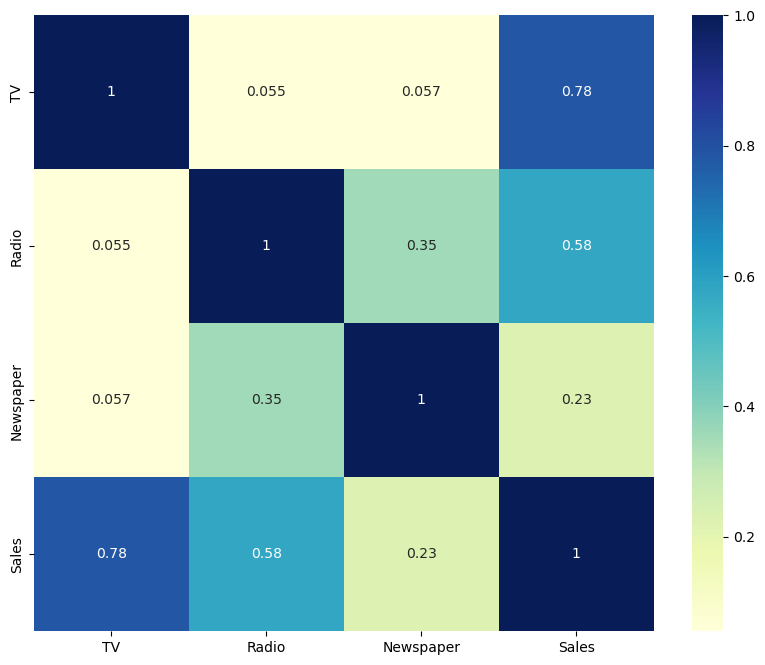

In [132]:
plt.figure(figsize=(10,8))
sns.heatmap(Dataset.corr(numeric_only = True), cmap="YlGnBu",
annot=True)

<Figure size 1000x800 with 0 Axes>

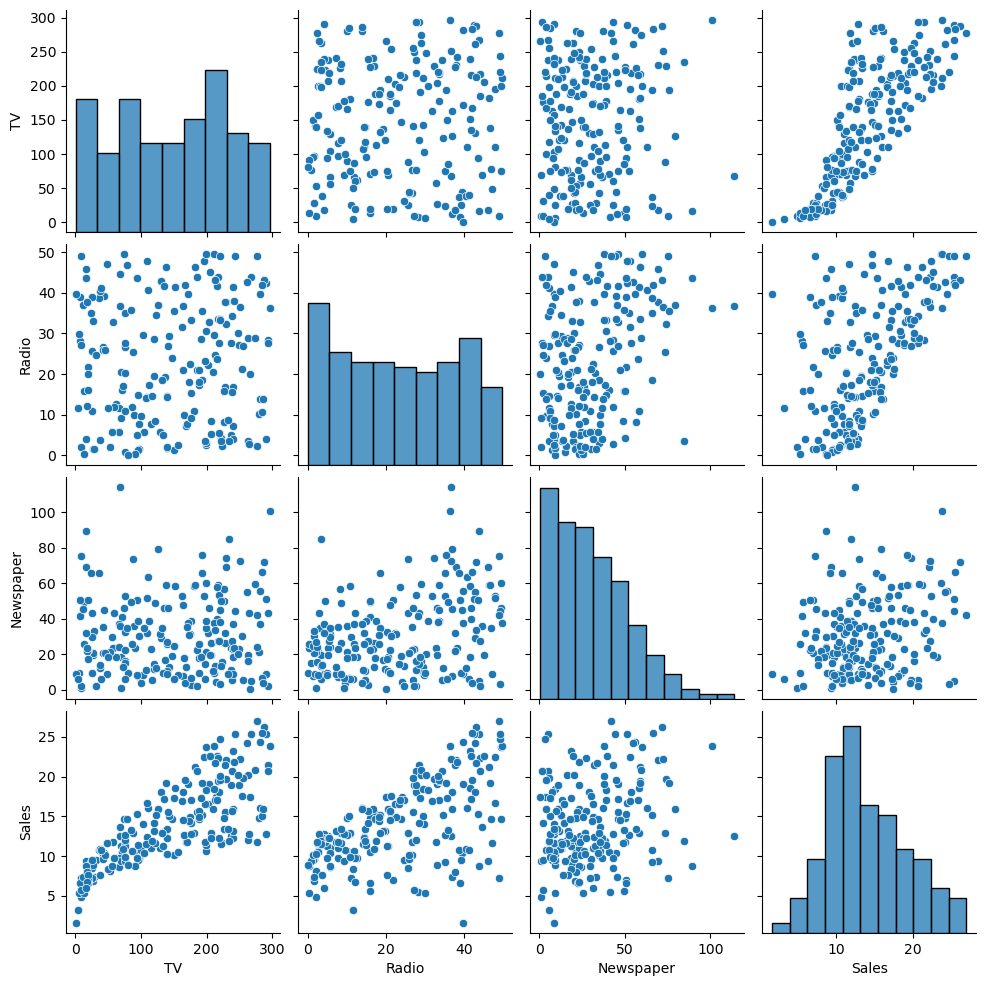

In [133]:
plt.figure(figsize=(10,8))
sns.pairplot(Dataset)

<Axes: xlabel='Sales'>

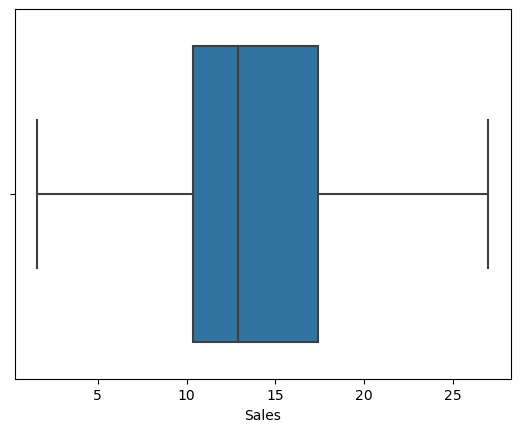

In [134]:
sns.boxplot(x='Sales', data=Dataset)

# Divding Dataset in toTarget and Features

In [135]:
X = Dataset.iloc[:,0:-1]

In [136]:
print(X)

        TV  Radio  Newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
..     ...    ...        ...
195   38.2    3.7       13.8
196   94.2    4.9        8.1
197  177.0    9.3        6.4
198  283.6   42.0       66.2
199  232.1    8.6        8.7

[200 rows x 3 columns]


In [137]:
Y = Dataset.iloc[:,-1]

In [138]:
print(Y)

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64


Using Train Test Split

In [139]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 0)

In [140]:
X_train

,TV,Radio,Newspaper
134,36.9,38.6,65.6
66,31.5,24.6,2.2
26,142.9,29.3,12.6
113,209.6,20.6,10.7
168,215.4,23.6,57.6
...,...,...,...
67,139.3,14.5,10.2
192,17.2,4.1,31.6
117,76.4,0.8,14.8
47,239.9,41.5,18.5


In [141]:
Y_train

134    10.8
66      9.5
26     15.0
113    15.9
168    17.1
       ... 
67     13.4
192     5.9
117     9.4
47     23.2
172     7.6
Name: Sales, Length: 160, dtype: float64

In [142]:
X_test

,TV,Radio,Newspaper
18,69.2,20.5,18.3
170,50.0,11.6,18.4
107,90.4,0.3,23.2
98,289.7,42.3,51.2
177,170.2,7.8,35.2
182,56.2,5.7,29.7
5,8.7,48.9,75.0
146,240.1,7.3,8.7
12,23.8,35.1,65.9
152,197.6,23.3,14.2


In [143]:
Y_test

18     11.3
170     8.4
107     8.7
98     25.4
177    11.7
182     8.7
5       7.2
146    13.2
12      9.2
152    16.6
61     24.2
125    10.6
180    10.5
154    15.6
80     11.8
7      13.2
33     17.4
130     1.6
37     14.7
74     17.0
183    26.2
145    10.3
45     14.9
159    12.9
60      8.1
123    15.2
179    12.6
185    22.6
122    11.6
44      8.5
16     12.5
55     23.7
150    16.1
111    21.8
22      5.6
189     6.7
129     9.7
4      12.9
83     13.6
106     7.2
Name: Sales, dtype: float64

Changing type of values from float to int

In [144]:
X_train = X_train.astype(int)
X_test = X_test.astype(int)
Y_train = Y_train.astype(int)
Y_test = Y_test.astype(int)

Standardizing the value

In [145]:
sc = StandardScaler()
X_train_scal = sc.fit_transform(X_train)
X_test_scal = sc.fit_transform(X_test)

# Model 1 - Linear Regression

In [146]:
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [147]:
model_lr = LinearRegression()

In [148]:
model_lr.fit(X_train_scal, Y_train)

LinearRegression()

In [149]:
prediction1 = model_lr.predict(X_test_scal)

In [150]:
prediction1

array([10.5868815 ,  8.05105808,  7.65439776, 24.16768785, 12.40168434,
        7.14011725, 13.21321881, 15.45686741, 11.39058025, 16.65954695,
       22.96066063,  9.62490848, 10.89720428, 15.85780054, 12.0266064 ,
       12.59716927, 19.0302851 , 11.27855261, 16.29377152, 17.53908741,
       24.2344939 , 10.01766382, 15.49173425, 12.83353019,  6.45327938,
       15.59177142, 12.79546407, 21.19925958, 13.80099929,  9.60693606,
       13.37491218, 21.5846153 , 18.26411539, 21.39767629,  7.16866039,
        6.85975561,  8.58013508, 13.35989764, 15.09971037,  6.95730337])

# Evaluating Model - 1 

In [151]:
r2_score(Y_test, prediction1)

0.8303910270450665

In [152]:
mean_absolute_error(Y_test, prediction1)


1.5004545333433845

In [153]:
mean_squared_error(Y_test, prediction1)

5.382964779157201

# Model 2 - Support Vector Regression

In [154]:
from sklearn.svm import SVR

In [155]:
model_svr = SVR()

In [156]:
model_svr.fit(X_train_scal, Y_train)

SVR()

In [157]:
prediction2 = model_svr.predict(X_test_scal)

In [158]:
prediction2

array([10.9372177 ,  8.87173443,  9.19637517, 21.43130079, 11.86529209,
        8.72444149, 11.25558383, 13.28655264, 10.49650383, 16.86469723,
       21.9820172 , 10.37384909, 11.00095894, 16.02336031, 12.17441005,
       13.21405493, 16.74319044,  9.36977489, 14.98639612, 17.53854141,
       20.64029962, 10.54715739, 15.75467798, 13.25643598,  8.22956804,
       16.34647231, 12.44022119, 21.3807743 , 11.89387767,  9.50672419,
       12.92900059, 21.33248927, 15.05519052, 21.4054457 ,  8.97103598,
        7.82370908, 10.00045198, 13.05301545, 13.97189593,  8.14880164])

# Evaluating Model - 2

In [159]:
r2_score(Y_test, prediction2)

0.855204986264642

In [160]:
mean_absolute_error(Y_test, prediction2)

1.4504634427486565

In [161]:
mean_squared_error(Y_test, prediction2)

4.595431748425922

# Model 3 - Logistic Regression

In [162]:
from sklearn.linear_model import LogisticRegression

In [163]:
model_lor = LogisticRegression()

In [164]:
model_lor.fit(X_train_scal, Y_train)

LogisticRegression()

In [165]:
prediction3 = model_lor.predict(X_test_scal)

In [166]:
prediction3

array([10,  9, 11, 19, 11, 11, 16, 12, 10, 15, 19, 11, 11, 14, 10, 11, 20,
        9, 19, 15, 22, 11, 15, 11,  9, 14, 11, 20, 12, 10, 16, 19, 15, 20,
       10,  9, 11, 11, 18,  9])

# Evaluating Model - 3 

In [167]:
r2_score(Y_test, prediction3)

0.6786136274123671

In [168]:
mean_absolute_error(Y_test, prediction3)

2.45

In [169]:
mean_squared_error(Y_test, prediction3)

10.2